In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

T=0.6

rootdir='~/STRUCTURAL-GLASS/OUTPUT/T'+str(T)+'/N65/shift/S0/chunksIS/'
filename='elistRidge.txt'
fullname=rootdir+filename
df=pd.read_csv(fullname, sep=' ',header=None, names=['time','Eridge','Eante','Epost'], skiprows=1, dtype={'time':np.float64,'Eridge':np.float32,'Eante':np.float32,'Epost':np.float32,})
df.tail()


,time,Eridge,Eante,Epost
394,2140035.5,-422.155182,-422.155884,-422.229645
395,2140036.5,-422.155182,-422.229645,-422.229645
396,2140887.5,-421.894684,-422.229645,-422.984589
397,2144891.5,-420.862244,-422.984589,-422.930695
398,2197324.5,-422.413971,-422.930695,-422.586487


In [3]:
nlines=len(df['time'])
dfen = pd.DataFrame(df['Eante'])
dfen.loc[nlines]=df['Epost'][nlines-1]
dfen.rename(index=str ,columns={'Eante':'Eis'},inplace=True)
dfen.head()


,Eis
0,-416.082550
1,-420.457123
2,-419.563446
3,-420.457123
4,-418.780396


In [4]:
dfentemp=dfen.copy(deep=True)
dfbasin=pd.DataFrame(columns=['Ebasin','t_ini','t_fin'])

MAXITER=5000
THRES=1e-4
ANALYZED=1
minimo=ANALYZED
for i in range(MAXITER):
    minimo=dfentemp['Eis'].min()
    if minimo>0: 
        break
    imins=dfentemp.index[ np.abs(dfentemp['Eis']-minimo)<THRES].tolist()
    ini=int(imins[0])
    fin=int(imins[-1])
    t_ini=np.int64(df['time'].iloc[ini]) if fin<nlines else np.int64(df['time'].iloc[nlines-1])
    t_fin=np.int64(df['time'].iloc[fin]) if fin<nlines else np.int64(df['time'].iloc[nlines-1])+1
    
    if np.abs(minimo-dfentemp['Eis'].iloc[ini])>THRES:
        raise ValueError('minimo: %g   elem: %g   |diff|: %g'%(minimo,dfentemp['Eis'].iloc[ini],np.abs(minimo-dfentemp['Eis'].iloc[ini])))
    if np.abs(minimo-dfentemp['Eis'].iloc[fin])>THRES:
        raise ValueError('%g  %g'%(minimo,dfentemp['Eis'].iloc[fin]))
    if t_fin-t_ini>0:
        #If there is no minimum between those values, we found the basin
        equals=np.where(np.abs(dfentemp['Eis'].iloc[ini:fin+1] - ANALYZED) <1e-10)[0]
        if len(equals ) == 0:
            dfbasin.loc[i]=[minimo, t_ini, t_fin]
        #If there is a minimum between those values, we must consider the subintervals
        else:
            ###
            # QUESTA PARTE VA FATTA, FORSE
            ###             
#             intervals=[(0,equals[0])]
#             for i in range(len(equals)-1):
#                 if equals[i+1]-equals[i]>1:
#                     intervals.append((equals[i],equals[i+1]))
#                 else:
#                     pass
#             raise SystemExit
            pass
         
    dfentemp['Eis'].iloc[ini:fin+1]=1

dfbasin=dfbasin.sort_values('t_ini')
dfentemp.tail()
dfbasin.head()
# del dfentemp

,Ebasin,t_ini,t_fin
32,-420.457123,5966.0,7087.0
4,-423.091919,9756.0,160106.0
2,-423.199127,162240.0,490766.0
0,-424.337738,499670.0,502619.0
10,-422.575226,507521.0,520117.0


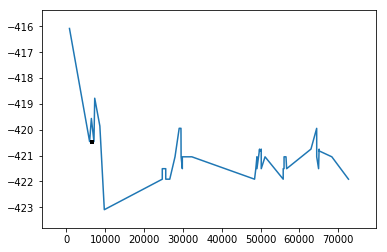

In [9]:
import pylab as pl
from matplotlib import collections as mc


lines = [[(row['t_ini'],row['Ebasin']),(row['t_fin'],row['Ebasin'])] for index,row in dfbasin.iterrows()]
fig, ax = pl.subplots()
lc = mc.LineCollection(lines, linewidths=4, color='black')
ax.plot(df['time'],df['Eante'],zorder=0)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
# plt.ylim((-406.5,-395))
plt.show()





In [130]:
for id,row in dfbasin.iterrows():
    print(row['t_ini'],'\t',row['t_fin'],'\t',row['Ebasin'])

373.0 	 12430660.0 	 -406.1844177246094
464.0 	 12430135.0 	 -406.3431701660156
12431446.0 	 12441835.0 	 -406.336181640625
13250629.0 	 14001168.0 	 -406.6158447265625
13250630.0 	 13250708.0 	 -407.01910400390625
13250769.0 	 14001155.0 	 -407.0962219238281
13251113.0 	 14001027.0 	 -407.1064758300781
14566634.0 	 16640383.0 	 -407.0272521972656
16640966.0 	 16642139.0 	 -406.302490234375
16641587.0 	 16641861.0 	 -406.60650634765625
16671696.0 	 16674868.0 	 -406.73809814453125
16674904.0 	 16681176.0 	 -406.7960205078125
16682273.0 	 16683559.0 	 -406.3528137207031
16684150.0 	 16684204.0 	 -406.4541931152344
16685206.0 	 16752724.0 	 -406.5528869628906
16685328.0 	 16751416.0 	 -406.5536193847656
16752775.0 	 16753476.0 	 -406.44171142578125
16754119.0 	 16869882.0 	 -406.2205505371094
16754231.0 	 16869202.0 	 -406.2700500488281
